In [1]:
# libs
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip install scikit-learn

In [3]:
data=pd.read_csv(r'classData.csv')

In [4]:
data.shape

(7861, 10)

In [5]:
# import data 
data.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [6]:
# clean the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [8]:
# Combing all fault together in one Fault_Type:
data['Fault_Type'] =data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')
data.head().style.set_properties(**{'background-color': 'red',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [9]:
# name to the fault according to the data description
data['Fault_Type'][data['Fault_Type'] == '0000' ] = 'NO Fault'
data['Fault_Type'][data['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
data['Fault_Type'][data['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
data['Fault_Type'][data['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [12]:
data.sample(10).style.set_properties(**{'background-color': 'green',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6765,0,0,0,0,23.783182,-29.975584,3.006655,0.562066,-0.103852,-0.458213,NO Fault
7106,0,0,0,0,-32.509198,-6.196370,35.622530,0.484087,-0.529437,0.045350,NO Fault
2802,0,1,1,0,-1.412497,-699.358224,703.177749,-0.354505,-0.015334,0.369839,Line B to Line C Fault
818,1,0,0,1,-840.772119,-63.867992,12.655692,0.165194,0.037270,-0.202464,Line A to Ground Fault
1469,1,0,1,1,-43.869149,787.089623,55.453138,0.036484,-0.219854,0.183369,Line A Line B to Ground Fault
5769,0,0,0,0,-44.854243,100.065365,-58.658787,-0.577282,0.107910,0.469372,NO Fault
6495,0,0,0,0,25.354520,63.666913,-92.290924,-0.443942,0.604946,-0.161004,NO Fault
5172,1,1,1,1,-800.779127,723.529090,77.247773,-0.001984,0.037664,-0.035680,Line A Line B Line C to Ground Fault
649,1,0,0,1,861.141322,42.158716,11.415654,0.015572,-0.315928,0.300356,Line A to Ground Fault
5343,1,1,1,1,554.917470,-873.171954,318.252221,-0.016884,-0.025178,0.042061,Line A Line B Line C to Ground Fault


In [13]:
data['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.
findfont: Font family 'Lucida Calligraphy' not found.


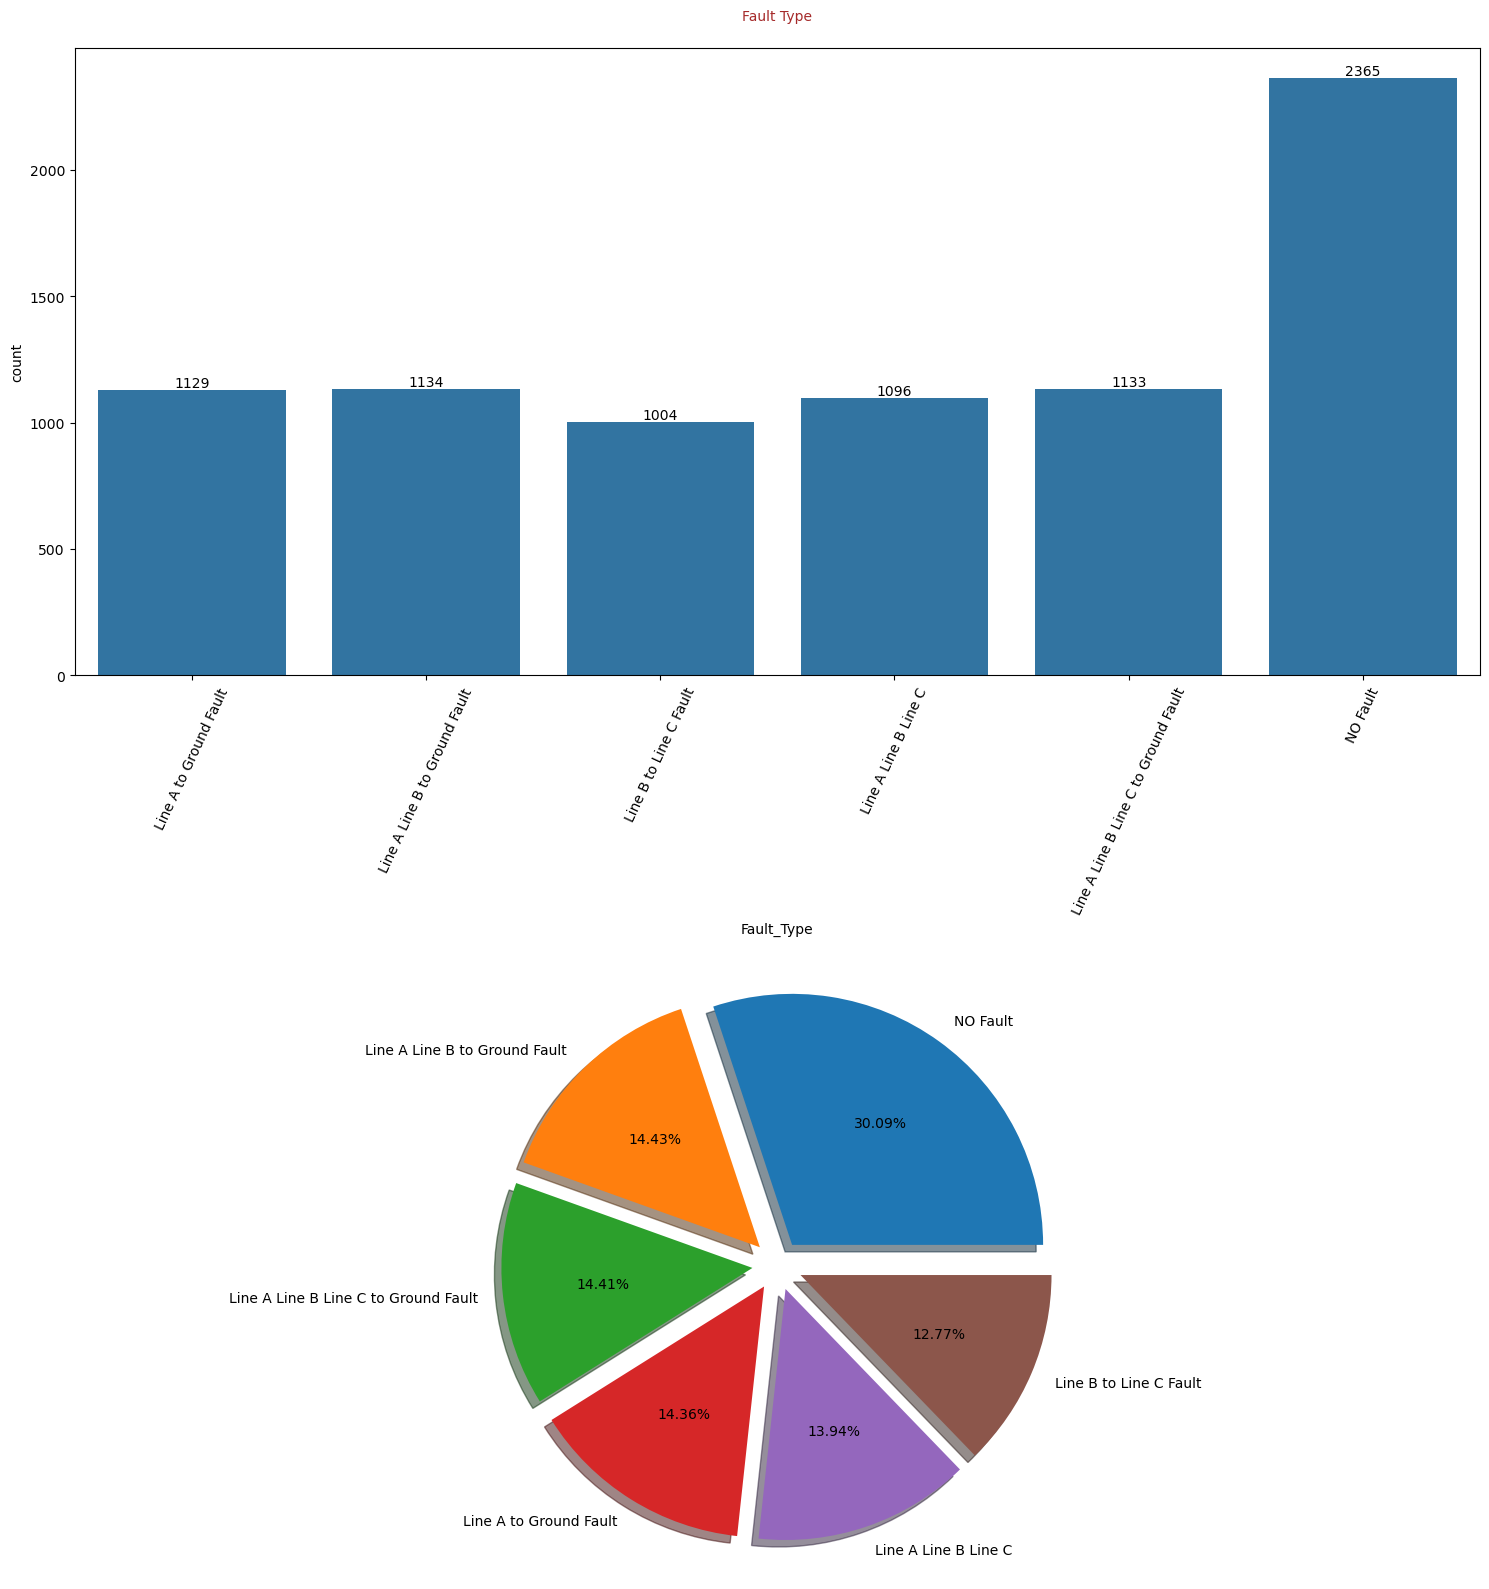

In [14]:
# Number of faults in the system according to their Fault_Type
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=data)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=data['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

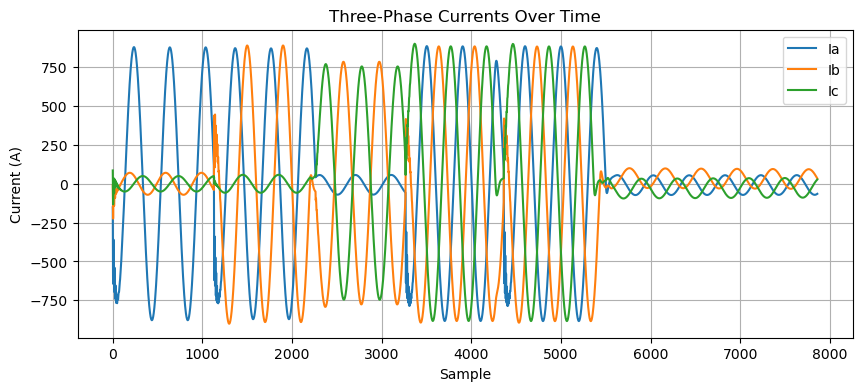

In [15]:
plt.figure(figsize = (10,4))
plt.plot(data["Ia"], label="Ia")
plt.plot(data["Ib"], label="Ib")
plt.plot(data["Ic"], label="Ic")
plt.title("Three-Phase Currents Over Time")
plt.xlabel("Sample")
plt.ylabel("Current (A)")
plt.legend()
plt.grid(True)


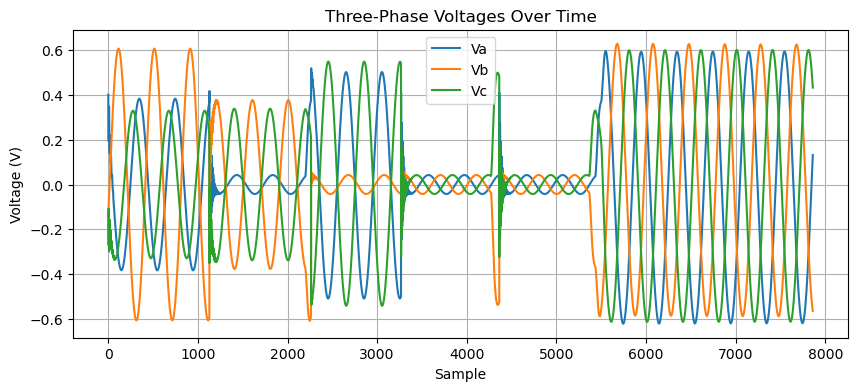

In [16]:
plt.figure(figsize = (10,4))
plt.plot(data["Va"], label="Va")
plt.plot(data["Vb"], label="Vb")
plt.plot(data["Vc"], label="Vc")
plt.title("Three-Phase Voltages Over Time")
plt.xlabel("Sample")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)

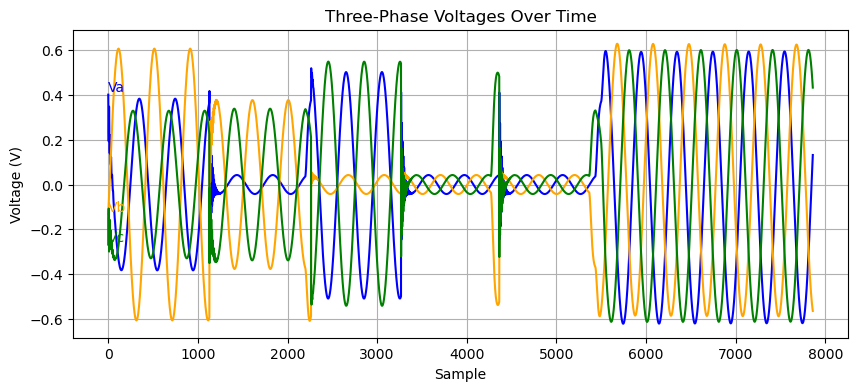

In [17]:
plt.figure(figsize = (10,4))

plt.plot(data["Va"], color='b')
plt.plot(data["Vb"], color='orange')
plt.plot(data["Vc"], color='g')

# Automatically place labels at beginning of each line
plt.text(0, data["Va"].iloc[0], "Va", color='b', va='bottom')
plt.text(0, data["Vb"].iloc[0], "Vb", color='orange', va='bottom')
plt.text(0, data["Vc"].iloc[0], "Vc", color='g', va='bottom')

plt.title("Three-Phase Voltages Over Time")
plt.xlabel("Sample")
plt.ylabel("Voltage (V)")
plt.grid(True)


In [18]:
# Separating Faults into different Categories

In [21]:
# 1. No Fault (Healthy System)
No_Fault = data[data['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6863,0,0,0,0,47.232229,31.753535,-82.141648,-0.184669,0.608589,-0.423920,NO Fault
7624,0,0,0,0,55.252713,-6.793986,-51.392044,0.181614,0.418331,-0.599944,NO Fault
6670,0,0,0,0,-60.461191,28.174106,29.072120,0.220511,-0.581079,0.360567,NO Fault
6277,0,0,0,0,-56.478686,22.573072,30.566902,0.279903,-0.585099,0.305196,NO Fault
6791,0,0,0,0,42.846632,-24.600727,-21.423701,0.439500,0.141842,-0.581342,NO Fault


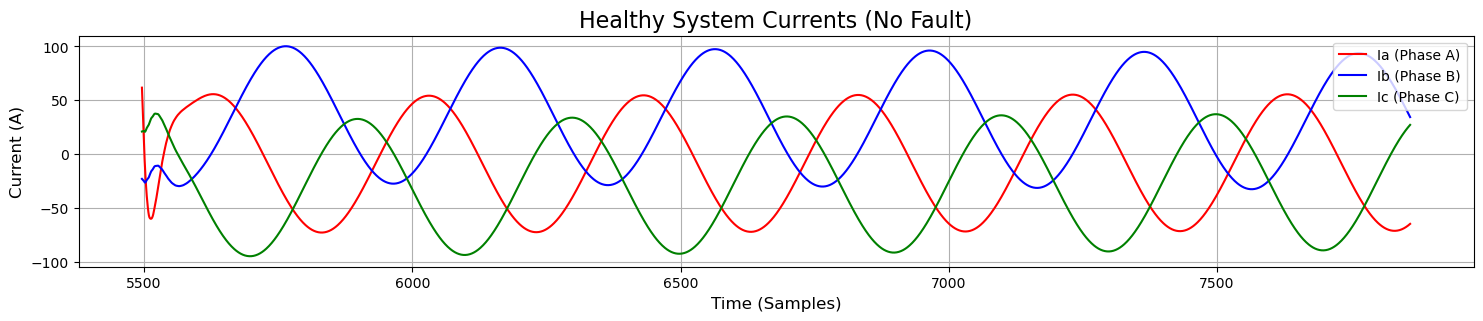

In [24]:
ax = plt.figure(figsize = (18,3))  # Create a figure with dimensions 18x3 inches
plt.plot(No_Fault["Ia"], 'r', label="Ia (Phase A)")  # Plot Phase A current in red ('r')
plt.plot(No_Fault["Ib"], 'b', label="Ib (Phase B)")  # Plot Phase B current in blue ('b')
plt.plot(No_Fault["Ic"], 'g', label="Ic (Phase C)")  # Plot Phase C current in green ('g')

plt.title("Healthy System Currents (No Fault)", fontsize=16)  # Add title with font size 16
plt.xlabel("Time (Samples)", fontsize=12)  # Label the x-axis as "Time (Samples)"
plt.ylabel("Current (A)", fontsize=12)  # Label the y-axis as "Current (A)"
plt.legend(loc='upper right')  # Add legend in the upper-right corner
plt.grid(True)  # Show gridlines on the plot


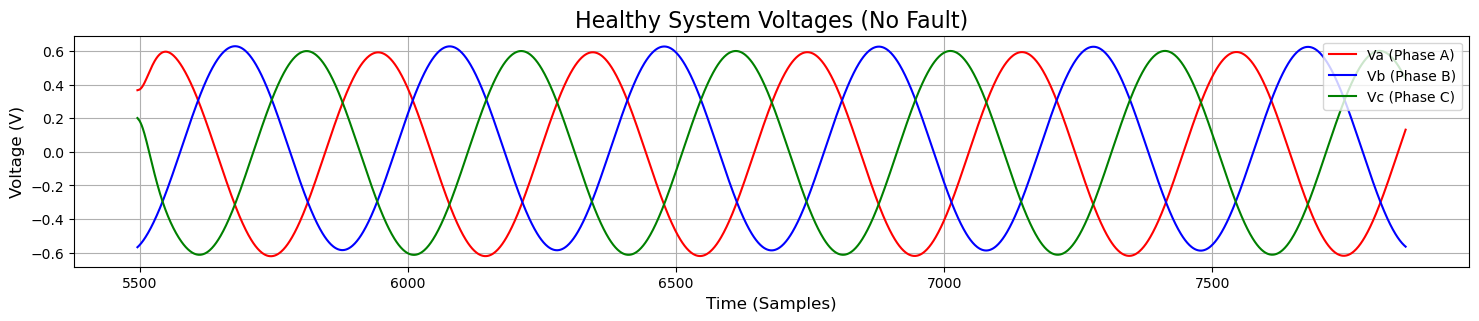

In [23]:
ax = plt.figure(figsize = (18,3))
plt.plot(No_Fault["Va"], 'r', label="Va (Phase A)")
plt.plot(No_Fault["Vb"], 'b', label="Vb (Phase B)")
plt.plot(No_Fault["Vc"], 'g', label="Vc (Phase C)")

plt.title("Healthy System Voltages (No Fault)", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)


In [25]:
# 2. Faulty System with Line A to Ground Fault
Line_AG_Fault = data[data['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


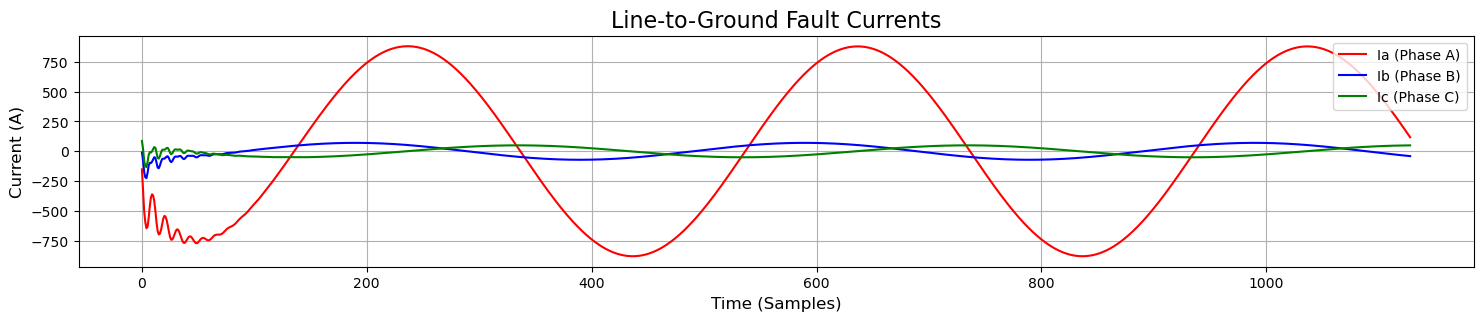

In [26]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_AG_Fault["Ia"], 'r', label="Ia (Phase A)")
plt.plot(Line_AG_Fault["Ib"], 'b', label="Ib (Phase B)")
plt.plot(Line_AG_Fault["Ic"], 'g', label="Ic (Phase C)")

plt.title("Line-to-Ground Fault Currents", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Current (A)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

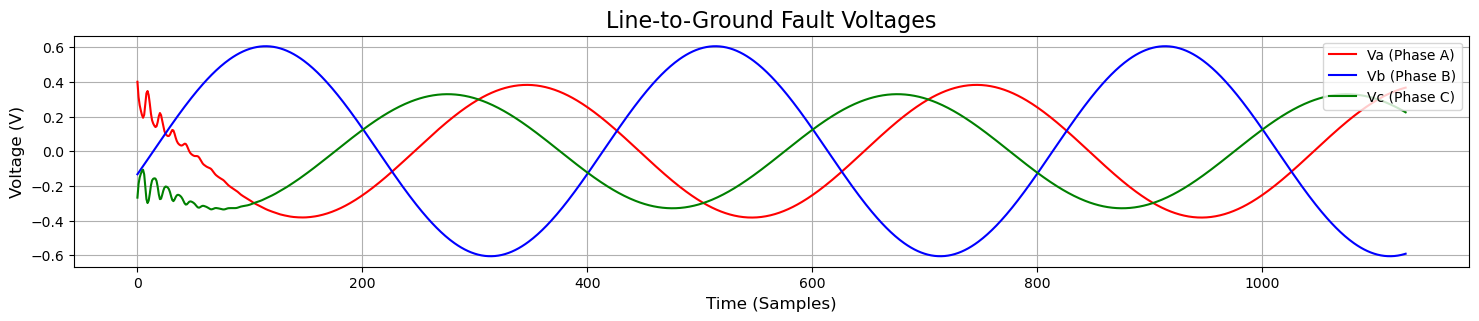

In [27]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_AG_Fault["Va"], 'r', label="Va (Phase A)")
plt.plot(Line_AG_Fault["Vb"], 'b', label="Vb (Phase B)")
plt.plot(Line_AG_Fault["Vc"], 'g', label="Vc (Phase C)")

plt.title("Line-to-Ground Fault Voltages", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

In [29]:
# Faulty System with Line A ,Line B to Ground Fault
Line_ABG_Fault = data[data['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


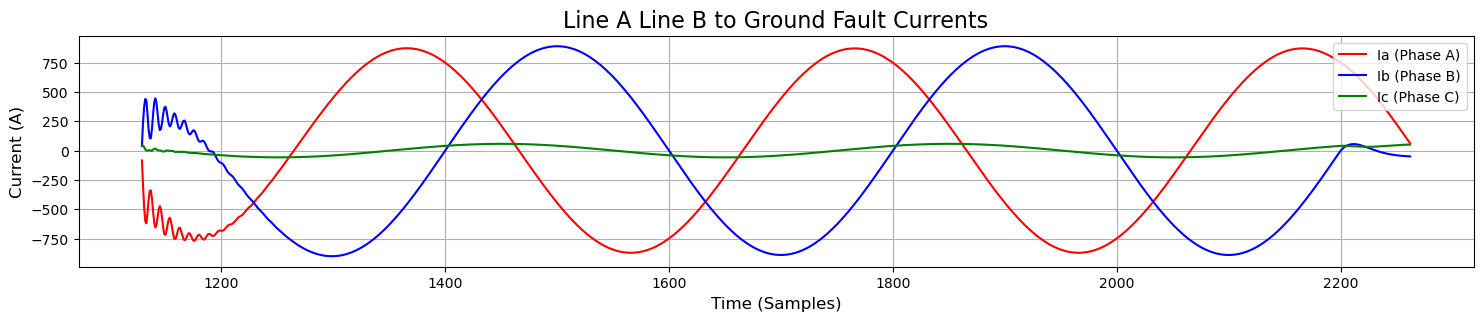

In [30]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_ABG_Fault["Ia"], 'r', label="Ia (Phase A)")
plt.plot(Line_ABG_Fault["Ib"], 'b', label="Ib (Phase B)")
plt.plot(Line_ABG_Fault["Ic"], 'g', label="Ic (Phase C)")

plt.title("Line A Line B to Ground Fault Currents", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Current (A)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)


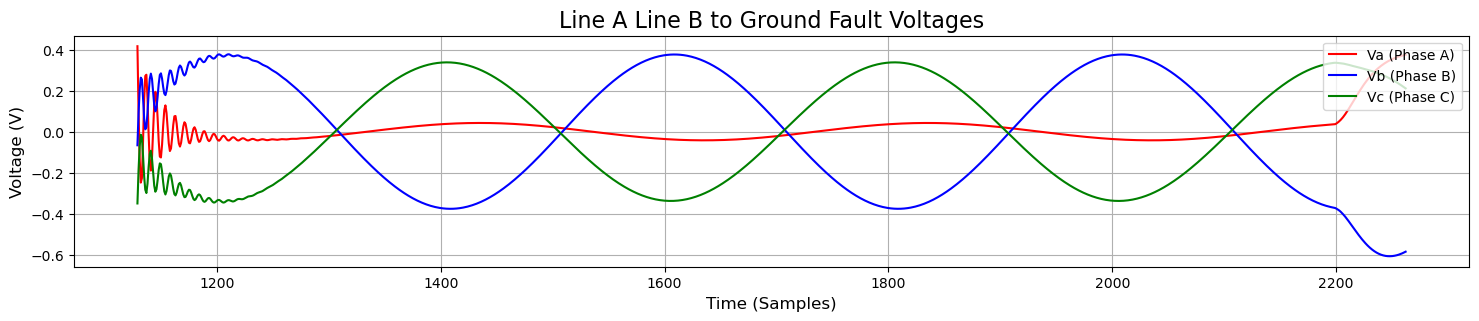

In [31]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_ABG_Fault["Va"], 'r', label="Va (Phase A)")
plt.plot(Line_ABG_Fault["Vb"], 'b', label="Vb (Phase B)")
plt.plot(Line_ABG_Fault["Vc"], 'g', label="Vc (Phase C)")

plt.title("Line A Line B to Ground Fault Voltages", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

In [33]:
#  Faulty System with Line B to Line C
Line_BC_Fault = data[data['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


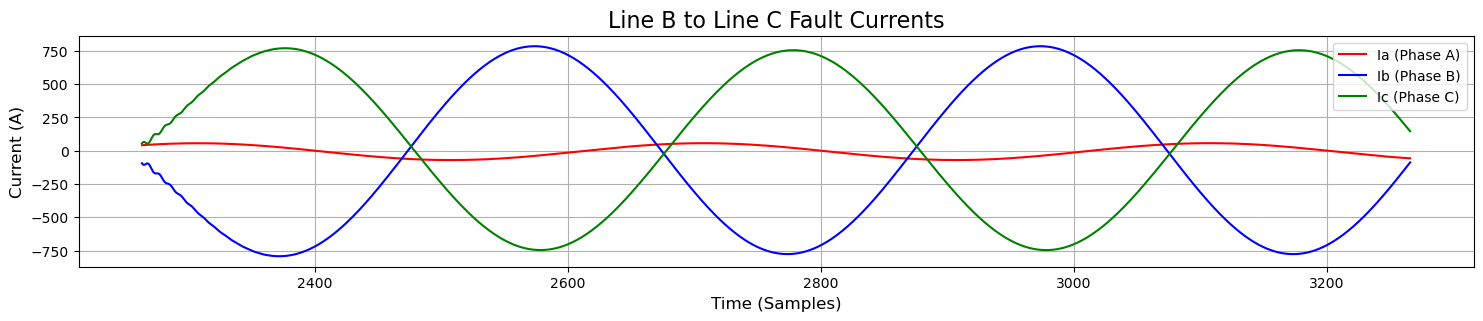

In [34]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_BC_Fault["Ia"], 'r', label="Ia (Phase A)")
plt.plot(Line_BC_Fault["Ib"], 'b', label="Ib (Phase B)")
plt.plot(Line_BC_Fault["Ic"], 'g', label="Ic (Phase C)")

plt.title("Line B to Line C Fault Currents", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Current (A)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

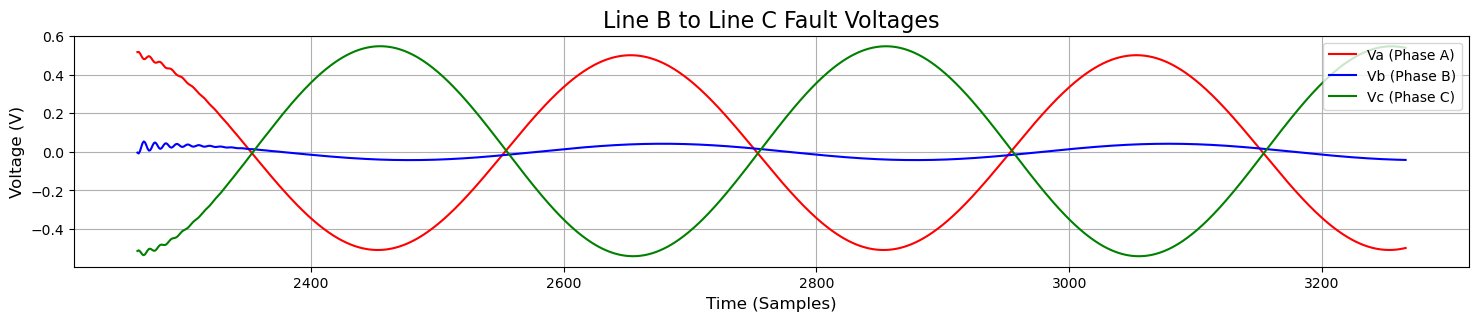

In [35]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_BC_Fault["Va"], 'r', label="Va (Phase A)")
plt.plot(Line_BC_Fault["Vb"], 'b', label="Vb (Phase B)")
plt.plot(Line_BC_Fault["Vc"], 'g', label="Vc (Phase C)")

plt.title("Line B to Line C Fault Voltages", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

In [36]:
# 5. Faulty System with Line A - Line B - Line C
Line_ABC_Fault = data[data['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


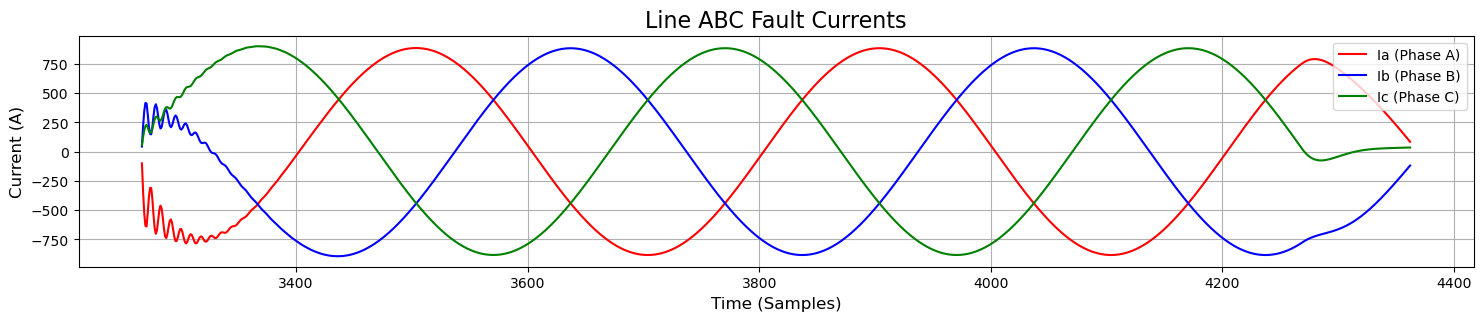

In [37]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_ABC_Fault["Ia"], 'r', label="Ia (Phase A)")
plt.plot(Line_ABC_Fault["Ib"], 'b', label="Ib (Phase B)")
plt.plot(Line_ABC_Fault["Ic"], 'g', label="Ic (Phase C)")

plt.title("Line ABC Fault Currents", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Current (A)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

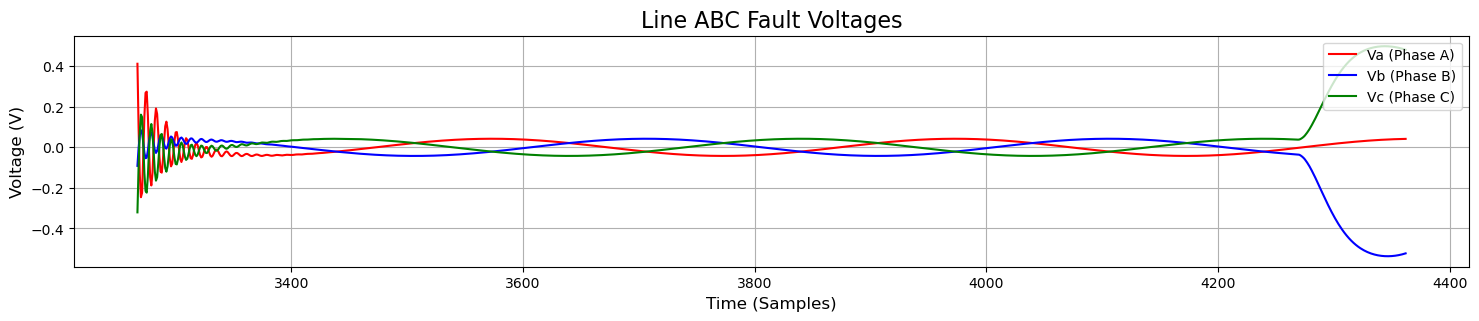

In [38]:
ax = plt.figure(figsize = (18,3))
plt.plot(Line_ABC_Fault["Va"], 'r', label="Va (Phase A)")
plt.plot(Line_ABC_Fault["Vb"], 'b', label="Vb (Phase B)")
plt.plot(Line_ABC_Fault["Vc"], 'g', label="Vc (Phase C)")

plt.title("Line ABC Fault Voltages", fontsize=16)
plt.xlabel("Time (Samples)", fontsize=12)
plt.ylabel("Voltage (V)", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

In [39]:
# 6. Faulty System with Line A - Line B - Line C - Ground
Line_ABCG_Fault = data[data['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()  # Create an instance of LabelEncoder
data['Fault_Type'] = encoder.fit_transform(data['Fault_Type'])  # Convert 'Fault_Type' column from categorical to numerical
data.head()  # Display the first 5 rows of the transformed dataset

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [41]:
X = data.drop(['Fault_Type'], axis=1)  # Remove the 'Fault_Type' column to create independent variables (features)
y = data['Fault_Type']  # 'Fault_Type' is the dependent variable (target)


In [42]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.1 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.1 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.1 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.1 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.1 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.1 MB 4.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/11.1 MB 4.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.1 MB 4.8 MB/s eta 0:00:02
   --------- -----

In [43]:
from sklearn.model_selection import train_test_split  # Import train_test_split to split data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  # Import evaluation metrics
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
import matplotlib.pyplot as plt  # Import matplotlib for plotting


Training Accuracy    : 89.06 %
Model Accuracy Score : 88.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      0.12      0.22       201
           5       1.00      1.00      1.00       482

    accuracy                           0.89      1573
   macro avg       0.92      0.85      0.82      1573
weighted avg       0.94      0.89      0.86      1573

--------------------------------------------------------


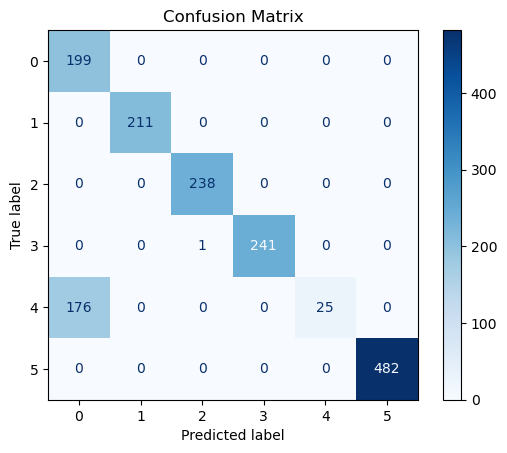

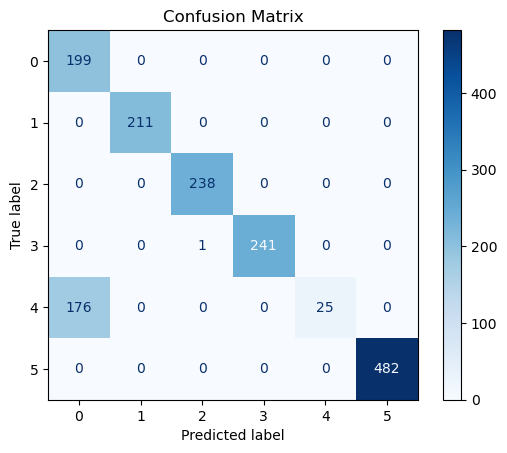

In [44]:
#supervices algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr), 
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#testing new methode
logreg1=LogisticRegression()
logreg1.fit(X_train,y_train)
y_pred_lr1=logreg1.predict(X_test)
log_train1=round(logreg1.score(X_train,y_train)*100,2)
log_accuracy1=round(accuracy_score(y_pred_lr1,y_test)*100,2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr1), 
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [45]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 991.0 kB/s eta 0:02:32
   ---------------------------------------- 0.1/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.3/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 0.6/150.0 MB 3.5 MB/s eta 0:00:43
   ---------------------------------------- 0.8/150.0 MB 4.1 MB/s eta 0:00:37
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.2/150.0 MB 2.3 MB/s eta

In [46]:
# Random Forest supervice algo
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), 
                                display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ImportError: cannot import name 'indices_to_mask' from 'sklearn.utils._mask' (C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\_mask.py)